In [1]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from osgeo import gdal
import salem
from salem import *

import fiona, rasterio
import geopandas as gpd
from rasterio.plot import show
from rasterio.features import rasterize
from rasterstats import zonal_stats
from sklearn.metrics import mean_squared_error as MSE
import pwlf
import math
from scipy import stats
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import statsmodels.api as stm
import statsmodels.formula.api as smf
from hydroeval import *
import xarray as xr
import pickle

import warnings
warnings.filterwarnings("ignore")

def cm2inch(*tupl):### plots in cm ##frontiers 180 mm for full width, 85 mm half width (1 column) figures
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    

In [2]:
fl_path = '/home/pelto/Desktop/ice_flux/Conrad/'
Glacier=['Conrad', 'Illecillewaet','Kokanee'];glacier=['conrad', 'illecillewaet','kokanee']
YR =[2016, 2017, 2018];letter=['A','B','C']
data = pd.DataFrame(columns=['glacier','source','year','V'])

In [3]:
### import vz

for G in Glacier: 
# G=0
    for Y in YR:

        #open file by glacier name
        fpath=fl_path[:-7]+G+'/'
        with open(fpath + str(Y)+'_vz.pkl', 'rb') as f:
            dc = pickle.load(f)

        #remove distriubuted thickness array
        K=np.array(dc)

        #find where there are values in this array
        IDX= np.ma.where(K > 0, )

        # pull out each value and save it in the dataframe called data
        for i in np.arange(0,len(IDX[0])):
            V=K[IDX[0][i]][IDX[1][i]]

            data=data.append({'glacier':G,'source':'vz','year':Y,'V': V,},ignore_index=True)

#         count+=1

In [4]:
data[10:]

,glacier,source,year,V
10,Conrad,vz,2016,6.933840
11,Conrad,vz,2016,5.529130
12,Conrad,vz,2016,6.198482
13,Conrad,vz,2016,5.568372
14,Conrad,vz,2016,1.997995
15,Conrad,vz,2016,2.925845
16,Conrad,vz,2016,2.799520
17,Conrad,vz,2016,7.126004
18,Conrad,vz,2016,7.389795
19,Conrad,vz,2016,6.604921


In [5]:
### import vfg

for G in Glacier: 
# G=0
    for Y in YR:

        #open file by glacier name
        fpath=fl_path[:-7]+G+'/'
        with open(fpath + str(Y)+'_Dvfg.pkl', 'rb') as f:
            dc = pickle.load(f)

        #remove distriubuted thickness array
        K=np.array(dc)

        #find where there are values in this array
        IDX= np.ma.where(K > 0, )

        # pull out each value and save it in the dataframe called data
        for i in np.arange(0,len(IDX[0])):
            V=K[IDX[0][i]]

            data=data.append({'glacier':G,'source':'vfg','year':Y,'V': V,},ignore_index=True)

#         count+=1

In [6]:
data[10:]

,glacier,source,year,V
10,Conrad,vz,2016,6.933840
11,Conrad,vz,2016,5.529130
12,Conrad,vz,2016,6.198482
13,Conrad,vz,2016,5.568372
14,Conrad,vz,2016,1.997995
15,Conrad,vz,2016,2.925845
16,Conrad,vz,2016,2.799520
17,Conrad,vz,2016,7.126004
18,Conrad,vz,2016,7.389795
19,Conrad,vz,2016,6.604921


In [7]:
### import ITS
for G in Glacier[:-1]: 
    for Y in YR:

        #open file by glacier name
        fpath=fl_path[:-7]+G+'/'
        with open(fpath + str(Y)+'_ITS.pkl', 'rb') as f:
            dc = pickle.load(f)

        #remove distriubuted thickness array
        K=np.array(dc)

        #find where there are values in this array
        IDX= np.ma.where(K > 0, )

        # pull out each value and save it in the dataframe called data
        for i in np.arange(0,len(IDX[0])):
            V=K[IDX[0][i]][IDX[1][i]]

            data=data.append({'glacier':G,'source':'ITS','year':Y,'V': V,},ignore_index=True)

#         count+=1

In [8]:
data

,glacier,source,year,V
0,Conrad,vz,2016,2.382855
1,Conrad,vz,2016,2.039207
2,Conrad,vz,2016,1.771750
3,Conrad,vz,2016,3.422759
4,Conrad,vz,2016,3.587904
5,Conrad,vz,2016,5.069386
6,Conrad,vz,2016,4.805593
7,Conrad,vz,2016,0.835388
8,Conrad,vz,2016,2.365152
9,Conrad,vz,2016,3.066941


In [9]:
Glacier

['Conrad', 'Illecillewaet', 'Kokanee']

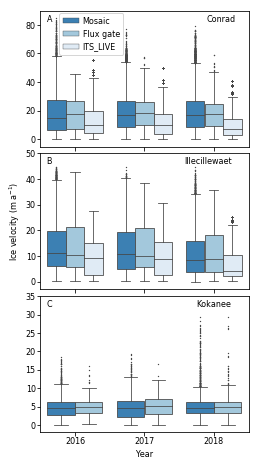

In [22]:
font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8}
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1';pylab.rcParams['ytick.major.pad']='1'

import seaborn as sns
fig_path= '/home/pelto/Desktop/ice_flux/figures/'
########### plot for all three glaciers
fig3, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(cm2inch(8.5, 16)),sharex=True) 
a=ax1,ax2,ax3
widths=25,25,20
for g in range(3):
    fpath=fl_path[:-7]+Glacier[g]+'/'    
    
    colors = ['#3182bd','#9ecae1','#deebf7']#['#003f5c','#bc5090','#ffa600']
    D=data[data.glacier==Glacier[g]]
    if g==1:
        D.V[D.V>45]=np.nan;D.dropna(subset=['V'],inplace=True); #remove anomalous patch in 2016 in acc. zone
    elif g==0:
        D.V[D.V>85]=np.nan;D.dropna(subset=['V'],inplace=True)
    Bob = sns.boxplot(x=D.year, y=D.V, hue=D.source, palette=colors, saturation=0.85, 
                      linewidth=0.80, fliersize=0.5, ax=a[g]) 
    
    a[g].text(0.03, 0.92, letter[g], transform=a[g].transAxes)
    if g==1:
        a[g].text(0.69, 0.92, Glacier[g], transform=a[g].transAxes) 
#         ax1.legend([],[], frameon=False);ax1.legend([],[], frameon=False) 
        leg = ax1.legend(ncol = 1, bbox_to_anchor=[0.245,1.01],loc='upper center', handletextpad=0.5,columnspacing=0.95)
        new_labels = ['Mosaic', 'Flux gate', 'ITS_LIVE']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)
    elif g==0:
        a[g].text(0.8, 0.92, Glacier[g], transform=a[g].transAxes) 
    elif g==2:
        a[g].text(0.75, 0.92, Glacier[g], transform=a[g].transAxes) 
#     ax2.legend(bbox_to_anchor=[0.44,1.02],loc='upper center', ncol=1, handletextpad=0.5,columnspacing=0.95)
#                (D.V,D.vsource),('Mosaic','FG','ITS_LIVE')
    ax3.legend([],[], frameon=False);ax2.legend([],[], frameon=False)       
    
#     leg = ax1.legend(ncol = 1, bbox_to_anchor=[0.44,-0.1],loc='upper center', handletextpad=0.5,columnspacing=0.95)
#     new_labels = ['Mosaic', 'Flux gate', 'ITS_LIVE']
#     for t, l in zip(leg.texts, new_labels): t.set_text(l)
        
        
ax3.patch.set_facecolor('white')
ax3.patch.set_alpha(0.0)    

ax1.set(ylabel=(''),ylim=(-5, 90),xlabel=('')) 
ax3.set(ylabel=(''),ylim=(-2, 35),xlabel=('Year')) 
ax2.set(ylabel=('Ice velocity (m a$^{-1}$)'),ylim=(-3, 50),xlabel=(''));
fig3.subplots_adjust(bottom=0.06, top=0.99, hspace=0.05, left=0.125, right=0.99, wspace=0.05)
# fig3.savefig(fig_path + 'All_Velocities_boxplt.pdf', dpi=300)
fig3.savefig(fig_path + 'Surface_ice_velocities_boxplot.pdf', dpi=300)

In [12]:
print(np.nanmean(data.V[(data.glacier=='Conrad')&(data.source=='vz')]),np.nanmean(data.V[(data.glacier=='Conrad')&(data.source=='vfg')]),np.nanmax(data.V[(data.glacier=='Conrad')&(data.source=='vz')]))
print(np.nanmean(data.V[(data.glacier=='Kokanee')&(data.source=='vz')]),np.nanmean(data.V[(data.glacier=='Kokanee')&(data.source=='vfg')]),np.nanmax(data.V[(data.glacier=='Kokanee')&(data.source=='vz')]))
print(np.nanmean(data.V[(data.glacier=='Illecillewaet')&(data.source=='vz')]),np.nanmean(data.V[(data.glacier=='Illecillewaet')&(data.source=='vfg')]),np.nanmax(data.V[(data.glacier=='Illecillewaet')&(data.source=='vz')]))

18.659140785628306 18.20154718205756 94.65583038330078
4.979527617924427 5.204269031697116 29.28390884399414
12.63177776143964 13.123036812042104 72.89796447753906


In [13]:
print(np.nanmedian(data.V[(data.glacier=='Illecillewaet')&(data.source=='vz')]),np.nanmedian(data.V[(data.glacier=='Illecillewaet')&(data.source=='vfg')&(data.year==2016)]),np.nanmax(data.V[(data.glacier=='Illecillewaet')&(data.source=='vz')&(data.year==2016)]))

10.181848049163818 10.531373707072238 72.89796447753906


In [30]:
PD=[]
year=[2016,2017,2018]
for yr in year:
    p=round(np.nanmedian(data.V[(data.glacier=='Illecillewaet')&(data.source=='ITS')&(data.year==yr)])/
            np.nanmedian(data.V[(data.glacier=='Illecillewaet')&(data.source=='vz')&(data.year==yr)]),3)
    PD.append(1.0-p)
PD

[0.19799999999999995, 0.17100000000000004, 0.503]

In [45]:
PD=[]
year=[2017,2018]
for yr in year:
    p=round(np.nanmedian(data.V[(data.glacier=='Illecillewaet')&(data.source=='vfg')&(data.year==2016)])/
            np.nanmedian(data.V[(data.glacier=='Illecillewaet')&(data.source=='vfg')&(data.year==yr)]),3)
    PD.append(1.0-p)
PD

[-0.03299999999999992, -0.20999999999999996]

In [46]:
PD2=[]
year=[2017,2018]
for yr in year:
    p=round(np.nanmedian(data.V[(data.glacier=='Conrad')&(data.source=='vfg')&(data.year==2016)])/
            np.nanmedian(data.V[(data.glacier=='Conrad')&(data.source=='vfg')&(data.year==yr)]),3)
    PD2.append(1.0-p)
PD2

[0.030000000000000027, 0.0040000000000000036]

In [47]:
PD3=[]
year=[2017,2018]
for yr in year:
    p=round(np.nanmedian(data.V[(data.glacier=='Kokanee')&(data.source=='vfg')&(data.year==2016)])/
            np.nanmedian(data.V[(data.glacier=='Kokanee')&(data.source=='vfg')&(data.year==yr)]),3)
    PD3.append(1.0-p)
PD3

[0.052000000000000046, -0.0020000000000000018]

In [48]:
np.mean([PD,PD2,PD3]),np.std([PD,PD2,PD3])

(-0.026499999999999968, 0.08621629776324195)

In [44]:
np.nanmedian(data.V[(data.glacier=='Conrad')&(data.source=='vz')&(data.year==2018)])

16.736705780029297

In [31]:
PD2=[]
year=[2016,2017,2018]
for yr in year:
    p=round(np.nanmedian(data.V[(data.glacier=='Conrad')&(data.source=='ITS')&(data.year==yr)])/
            np.nanmedian(data.V[(data.glacier=='Conrad')&(data.source=='vz')&(data.year==yr)]),3)
    PD2.append(1.0-p)
PD2

[0.30400000000000005, 0.41700000000000004, 0.581]

In [32]:
PD.extend(PD2)

In [33]:
np.mean(PD),np.median(PD),np.std(PD)

(0.3623333333333334, 0.36050000000000004, 0.15144159123422982)

In [18]:
print(np.nanmedian(data.V[(data.glacier=='Conrad')&(data.source=='ITS')])/np.nanmedian(data.V[(data.glacier=='Conrad')&(data.source=='vz')]))

0.539291858271143


In [156]:
np.nanmean(data.V[(data.glacier=='Conrad')&(data.source=='ITS')]),np.nanmean(data.V[(data.glacier=='Illecillewaet')&(data.source=='ITS')])

(11.693973387149954, 8.992772793385326)

In [161]:
np.mean([1-11.69/18.66, 1-8.99/13.03])

0.3417899907789675

In [ ]:
#         meanlineprops = dict(linestyle='--', lw=0.5, color='r');medianprops = dict(linestyle='-', lw=0.5,color='k')
#         boxprops = dict(linewidth=0.25);
#         BOXVEL=a[g].boxplot(data[data.year==YR].V.values,meanprops=meanlineprops,medianprops=medianprops,boxprops=boxprops, 
#                 whiskerprops=boxprops, showmeans=True, meanline=True, positions=data.year[data.year==YR].values 
#                 ,labels=data[data.year==YR].source.values, sym='',widths=widths[g],capprops=boxprops,zorder=1) #, positions=float(YR)
#         
#     if g==0:
#         GE=[]
#         for i in range(len(gates_elev)):
#             G=gates_elev[i]-30;  GE.append(G)
#         bx=dict(linewidth=0.25);flp=dict(color='#1c9099',s=10,facecolor='')
#         BOXstakes=ax1.boxplot(stk_fg[:-7],meanprops=meanlineprops,medianprops=medianprops,boxprops=bx, 
#             whiskerprops=boxprops, showmeans=True, meanline=True, sym='', positions=GE[:-6],widths=widths[g], 
#             capprops=boxprops,flierprops=flp,zorder=1,patch_artist=True)
       
#         clrs='lightblue'
#         for patch, color in zip(BOXstakes['boxes'], clrs):
#             patch.set_facecolor(clrs)
            
#     if g==2:
#         GE=[]
#         for i in range(len(gates_elev)):
#             G=gates_elev[i]-25;  GE.append(G)
#         kBOXstakes=ax3.boxplot(Kstk_fg[:-2],meanprops=meanlineprops,medianprops=medianprops,boxprops=bx, 
#             whiskerprops=boxprops, showmeans=True, meanline=True, sym='', positions=GE[:-1],widths=widths[g], 
#             capprops=boxprops,flierprops=flp,zorder=1,patch_artist=True)
#         clrs='lightblue'
#         for patch, color in zip(kBOXstakes['boxes'], clrs):
#             patch.set_facecolor(clrs)
        
#     ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))
#     ax1.set_xticklabels(['',2000, '', 2400, '', 2800, '',3200, '']); ax1.set(xlim=(1875, 3125))
#     ax1.text(0.58, 0.9, 'C10', fontsize=8,transform=ax1.transAxes)
#     ax2.set_xticks([2100, 2200,  2300, 2400, 2500, 2600])  #, 2650])
#     ax2.set_xticklabels(["", 2200,  "", 2400, "", 2600]) 
#     ax2.set(xlim=(2090, 2675));#ax2.set_yticklabels([""])
#     ax3.set_xticklabels([2300, '', 2500, '', 2700, '']) 
#     ax3.set_xticks([2300, 2400, 2500, 2600, 2700, 2800]);ax3.set_yticks([0, 5, 10, 15]) 
#     ax3.set(xlim=(2290, 2730));#ax3[2,0].set_yticklabels([""])

#     ax3.set_zorder(1)
#     ax3.patch.set_visible(False)
    